#**Ejercicios Regresion Lineal Multiple**

Lucas Argento

Contiene los ejercicios:

- Guia RLM 1: Problema 7
- Guia RLM 2: Problema 1

## ***Guía 1: Problema 7***

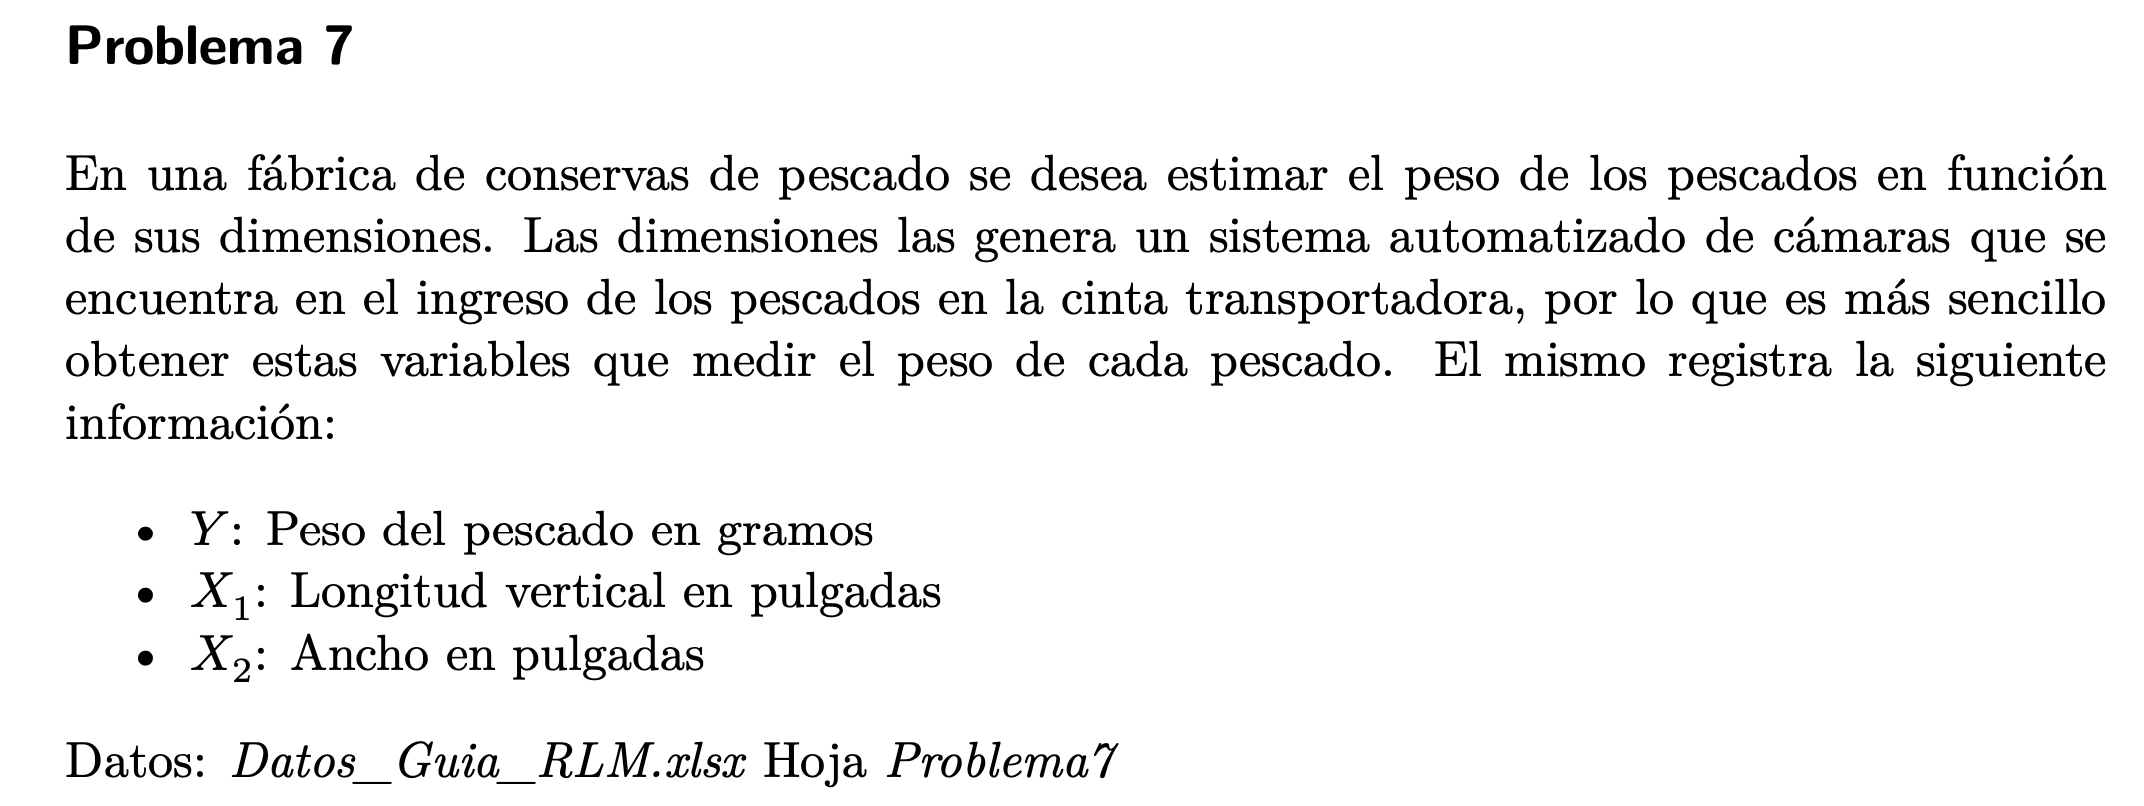

### **A) Represente el Peso de los pescados vs su longitud y ancho en un gráfico de 3 dimensiones. Entrene y valide un modelo para estimar la variable correspondiente según las otras, y luego agregue el plano de regresión estimado al gráfico.**

In [25]:
#install.packages("plot3D")

In [26]:
#install.packages("rgl")
library(rgl)
library(readxl)
library(plot3D)

Warning message:
“no DISPLAY variable so Tk is not available”


In [59]:
# cargamos y renombramos los datos
datos <- read_excel("Datos_Guia_RLM.xlsx", sheet = "Problema7")
names(datos) <- c("peso", "ancho", "longitud")

In [60]:
head(datos)

peso,ancho,longitud
<dbl>,<dbl>,<dbl>
242,23.2,30.0
290,24.0,31.2
340,23.9,31.1
363,26.3,33.5
430,26.5,34.0
450,26.8,34.7


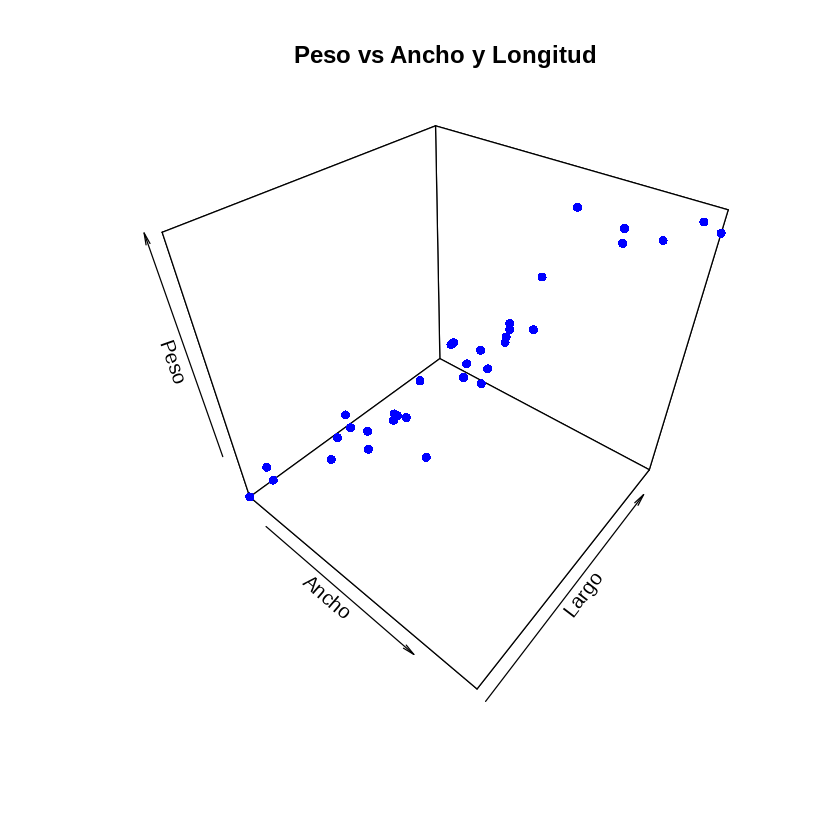

In [61]:
# Plot the 3D graph
scatter3D(datos$ancho, datos$longitud, datos$peso, col = "blue", pch = 16, main = "Peso vs Ancho y Longitud",
          xlab = "Ancho", ylab = "Largo", zlab = "Peso", interactive = TRUE)

In [62]:
# fiteamos un modelo de rlm para predecir la variable peso
modelo_rlm <- lm(formula = peso ~ ancho + longitud, data = datos)
resumen_rlm <- summary(modelo_rlm)
resumen_rlm


Call:
lm(formula = peso ~ ancho + longitud, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-222.167  -30.988    0.608   41.862  155.345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1354.38     147.85  -9.161 1.85e-10 ***
ancho         -53.02      37.54  -1.412  0.16750    
longitud       93.32      32.45   2.876  0.00711 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.13 on 32 degrees of freedom
Multiple R-squared:  0.9031,	Adjusted R-squared:  0.8971 
F-statistic: 149.1 on 2 and 32 DF,  p-value: < 2.2e-16


> - Si bien la longitud y el intercepto resultaron significativos para predecir el peso, el ancho no presenta un Pvalor < 0.05 (~0.08)
- El valor del R2a tambien resulto suficiente, estando en el orden de 0.9

In [36]:
# Extract coefficients from the rlm model
coefficients_rlm <- coef(modelo_rlm)

# Define points on the plane (using the range of your data)
ancho_grid <- seq(min(datos$ancho), max(datos$ancho), length.out = 10)
longitud_grid <- seq(min(datos$longitud), max(datos$longitud), length.out = 10)
plane_points <- expand.grid(ancho_grid, longitud_grid)

# el plano como tal
z_plane <- matrix(coefficients_rlm[1] +
                  coefficients_rlm[2] * plane_points[,1] +
                  coefficients_rlm[3] * plane_points[,2],
                  nrow = length(ancho_grid), ncol = length(longitud_grid))

# agregar el plano al grafico
planes3d(coefficients_rlm[1], coefficients_rlm[2], coefficients_rlm[3], coefficients_rlm[4],
         draw_polygon = TRUE, col = "lightgray", alpha = 0.5)

>**Tuve problemas para visualizar el plot 3d en R por lo que arme el modelo en python usando statsmodel (el modelo fiteado es el mismo, con los mismos coeficientes y significancias) y lo plotie usando plotly:**

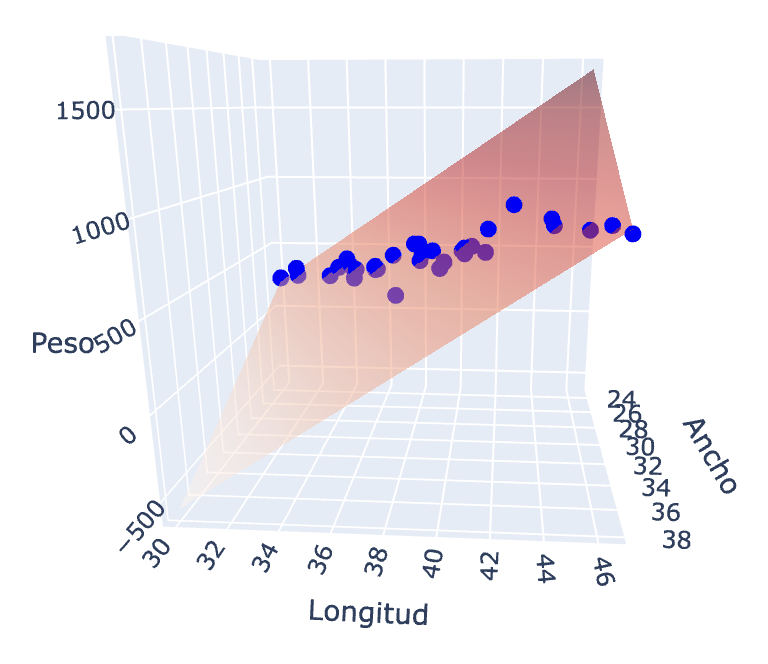

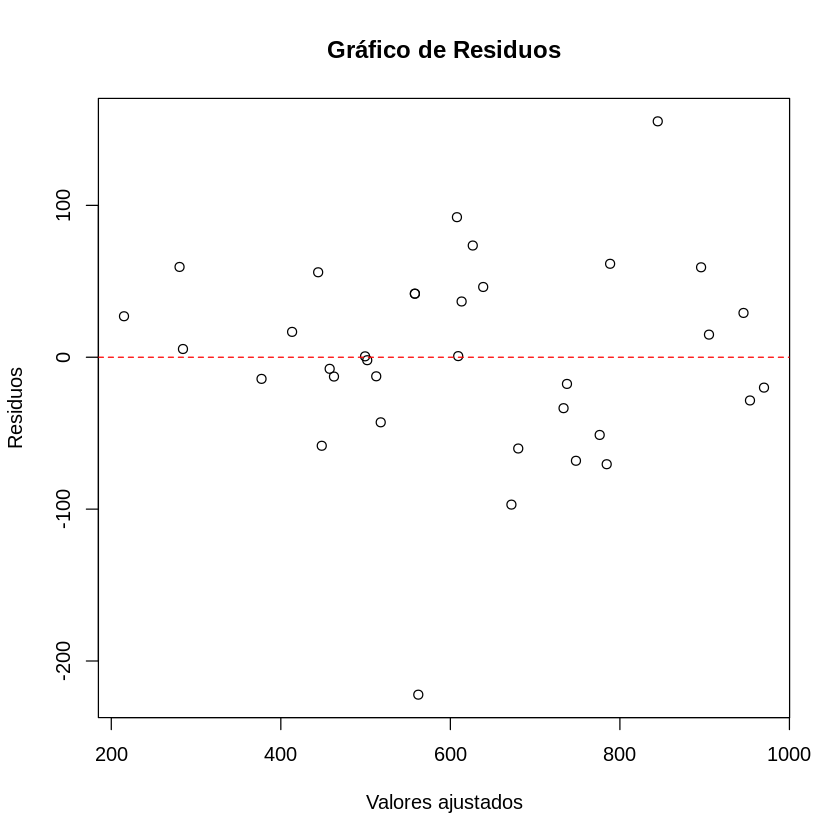

In [54]:
# Graficar los residuos
plot(x = modelo_rlm$fitted.values, y = residuals(modelo_rlm),
     xlab = "Valores ajustados", ylab = "Residuos",
     main = "Gráfico de Residuos")
abline(h = 0, col = "red", lty = 2)

### **B) Realice un diagrama de dispersión entre las dos variables explicativas. Calcule el coeficiente de correlación entre ambas variables. ¿Como se relacionan estos resultados con el modelo de regresión?**


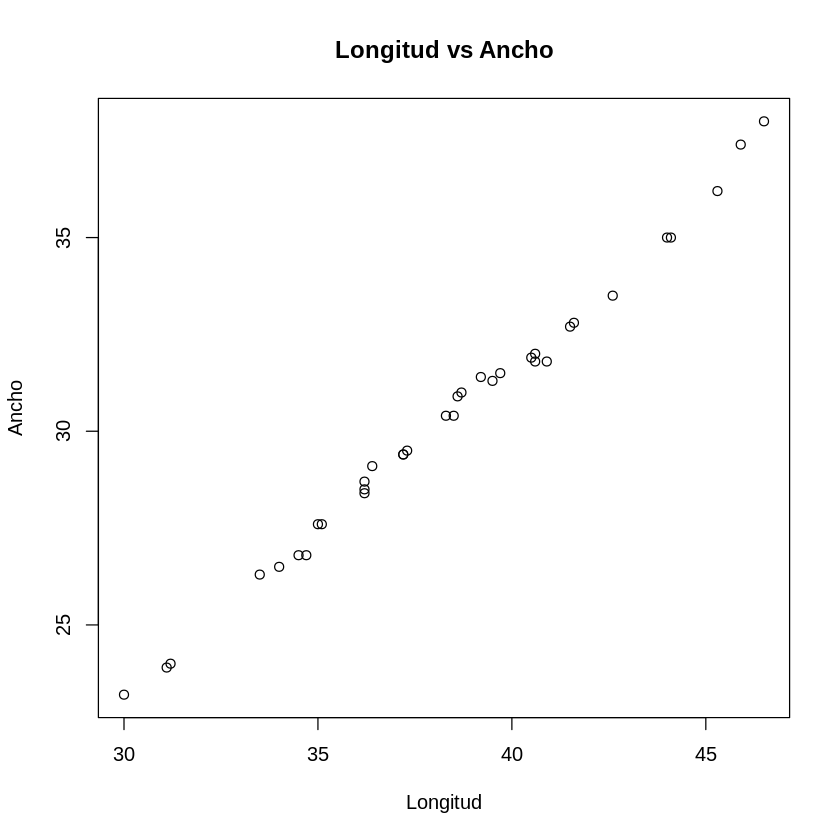

In [39]:
# diagrama de dispersion
plot(datos$longitud, datos$ancho,
     xlab = "Longitud", ylab = "Ancho",
     main = "Longitud vs Ancho")

> La relacion entre ambas variables, a partir de observar el grafico de dispersión, parece indicar una muy fuerte correlacion lineal entre ambas.

In [41]:
correlation_coefficient <- cor(datos$longitud, datos$ancho)
round(correlation_coefficient,3)

[1] 0.996

> Confirmamos que la correlacion es muy alta. Obtenemos un resultado de .996 positivo, lo que nos permite decir que existe una relacion lineal muy marcada entre ambas variables, y que para pescados con mayor longitud es esperable encontrar un mayor ancho tambien. Algo asi como "cuando aumenta la longitud tambien aumenta el ancho, en promedio".

> Estos altos valores de correlacion podrian indicar problemas de colinealidad en nuestro modelo, empeorandolo y causando problemas de inestabilidad en los coeficientes.

### **C) Represente el Peso de los pescados vs su longitud en un gráfico. Y en otro gráfico, represente el Peso de los pescados vs su ancho. Entrene y valide dos modelos de regresión lineal simple, uno en que la variable explicativa sea la longitud y otro que la variable explicativa sea el ancho.**

> **Submodelo 1: Peso(Longitud)**

[1] "Coeficiente de correlación entre la variable explicativa y la variable target: 0.947"


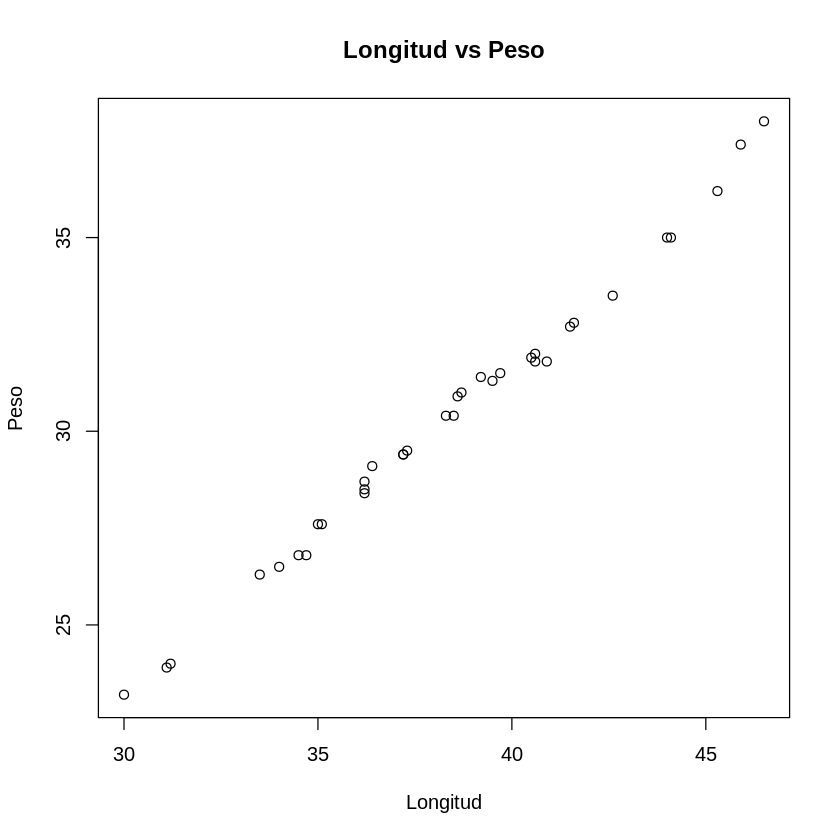

In [48]:
# diagrama de dispersion
plot(datos$longitud, datos$ancho,
     xlab = "Longitud", ylab = "Peso",
     main = "Longitud vs Peso")
correlation_coefficient <- cor(datos$longitud, datos$peso)
print(paste("Coeficiente de correlación entre la variable explicativa y la variable target:", round(correlation_coefficient,3)))

In [49]:
# fiteamos el primer submodelo
rlm_sub1 <- lm(formula = peso ~ longitud, data = datos)
resumen_sub_1 <- summary(rlm_sub1)
resumen_sub_1


Call:
lm(formula = peso ~ longitud, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-227.59  -24.26   -4.85   32.77  179.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1209.97     108.39  -11.16 9.61e-13 ***
longitud       47.66       2.81   16.96  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.13 on 33 degrees of freedom
Multiple R-squared:  0.8971,	Adjusted R-squared:  0.8939 
F-statistic: 287.6 on 1 and 33 DF,  p-value: < 2.2e-16


> - Coeficientes significativos
- Buen ajuste R2a

> **Submodelo 2: Peso(Ancho)**

[1] "Coeficiente de correlación entre la variable explicativa y la variable target: 0.996"


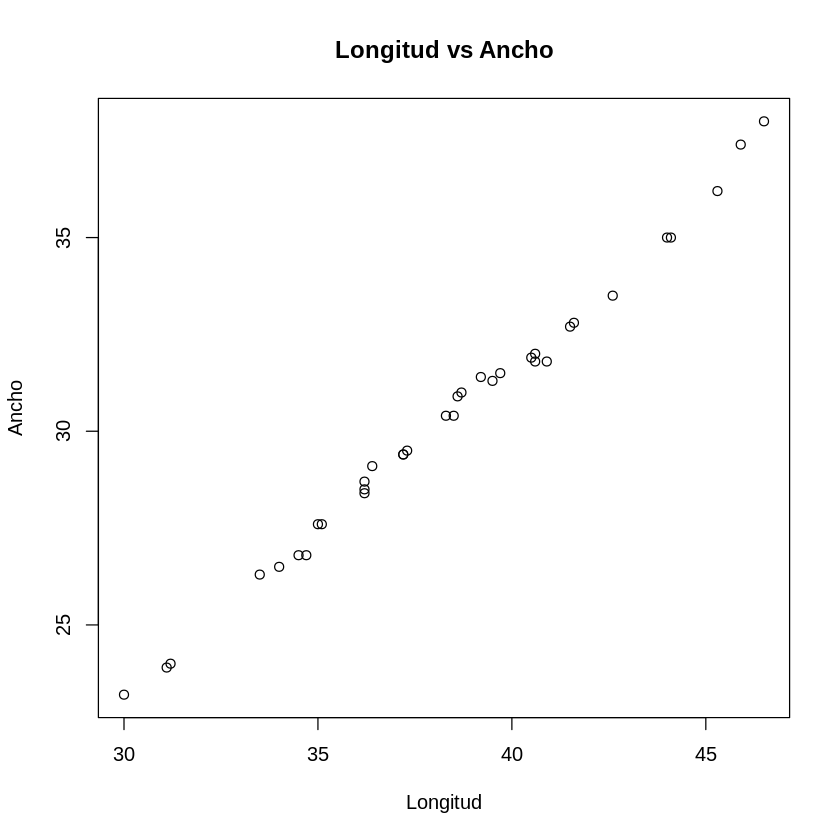

In [50]:
# diagrama de dispersion
plot(datos$longitud, datos$ancho,
     xlab = "Longitud", ylab = "Ancho",
     main = "Longitud vs Ancho")
correlation_coefficient <- cor(datos$longitud, datos$ancho)
print(paste("Coeficiente de correlación entre la variable explicativa y la variable target:", round(correlation_coefficient,3)))

In [51]:
# fiteamos el segundo submodelo
rlm_sub2 <- lm(formula = peso ~ ancho, data = datos)
resumen_sub_2 <- summary(rlm_sub2)
resumen_sub_2


Call:
lm(formula = peso ~ ancho, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-233.877  -35.377   -4.797   31.578  207.923 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1035.348    107.973  -9.589 4.58e-11 ***
ancho          54.550      3.539  15.415  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.15 on 33 degrees of freedom
Multiple R-squared:  0.8781,	Adjusted R-squared:  0.8744 
F-statistic: 237.6 on 1 and 33 DF,  p-value: < 2.2e-16


> - Coeficientes significativos
- Buen ajuste R2a pero levemente peor que el modelo anterior

### **D) Cambian los coeficientes de regresion estimados de cada variable para los modelos de regresion lineal simple frente a los coeficientes estimados el modelo de regresion lineal multiple? Por que?**

> Si! los coeficientes del modelo multiple son:

- Para el ancho: -53.02  
- Para la longitud: 93.32

> Mientras que en los casos de las regresiones simples, los coeficientes son:

- Ancho: 54.550
- Longitud: 47.66

> Se observan claras diferencias entre los mismos. Este efecto es probable que sea causa de colinealidad entre las variables predictoras, lo cual refuerza la creencia, producto del analisis de los graficos de correlación, de que existe una dependencia lineal entre ellas.

### **E) Analice la multicolinealidad de las variables explicativas, mediante indicadores adecuados. Cual seria el ppal inconveniente? Que otros inconvenientes conlleva este? Tome una decision respecto a la multicolinealidad y que hacer con el modelo.**

In [57]:
#install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’




In [69]:
# Calculamos el DET del modelo
mm <- model.matrix(modelo_rlm)
det_value <- det(cor(mm[,-1]))

# Print DET value
print(paste("VALOR DEL DETERMINANTE DE LA MATRIZ DE CORRELACION PARA EL MODELO MULTIPLE:", det_value))

[1] "VALOR DEL DETERMINANTE DE LA MATRIZ DE CORRELACION PARA EL MODELO MULTIPLE: 0.00728104519226069"


> Un Determinante cercano a cero nos indica que el modelo tiene problemas de colinealidad.

In [70]:
# Calculamos los VIF para cada predictora
vif_values <- vif(modelo_rlm)
vif_values

ancho longitud 
137.3429 137.3429

> En general, se entiende que variables con VIF superiores a 5 (o 10 si se quiere ser mas flexible) indican variables con dependencias linealies en el modelo. Es decir, que presentan problemas de colinealidad.

> El principal inconveniente de la colinealidad en los modelos de regresion es que causa inestabilidad en los coeficientes del modelo, agregando variabilidad en el mismo y generando problemas en la inferencia, lo que se traduce en una reducccion de su confiabilidad y un aumento en el error de futuras predicciones.

> Tambien dificulta la interpretación de los efectos de las variables predictora en la variable a predecir y puede hacer que consideremos como significativa una/s variable/s que en realidad no lo es/son.

> Para este problema puntual, eliminaria del modelo la variable del ancho, ya que previamente observamos que el modelo de RLS con la longitud presenta un mejor R2ajustado.

## ***Guia 2: Problema 1***

Segun GPT:

*Un problema de análisis confirmatorio se refiere a una situación en la que se busca confirmar o validar una teoría o modelo previamente formulado mediante la recopilación y análisis de datos. En el contexto del análisis de datos, existen dos enfoques principales: el análisis exploratorio y el análisis confirmatorio.*

- *Análisis exploratorio: En este enfoque, se realizan exploraciones de los datos para descubrir patrones, tendencias o relaciones que puedan no haber sido consideradas previamente. Este enfoque es más flexible y no se basa en suposiciones previas sobre las relaciones entre las variables.*

- *Análisis confirmatorio: En contraste, el análisis confirmatorio se basa en una teoría o modelo previamente formulado, y el objetivo principal es confirmar o refutar hipótesis específicas utilizando datos recopilados. En este enfoque, se establecen hipótesis a priori y se utilizan técnicas estadísticas para probar estas hipótesis utilizando los datos observados.*

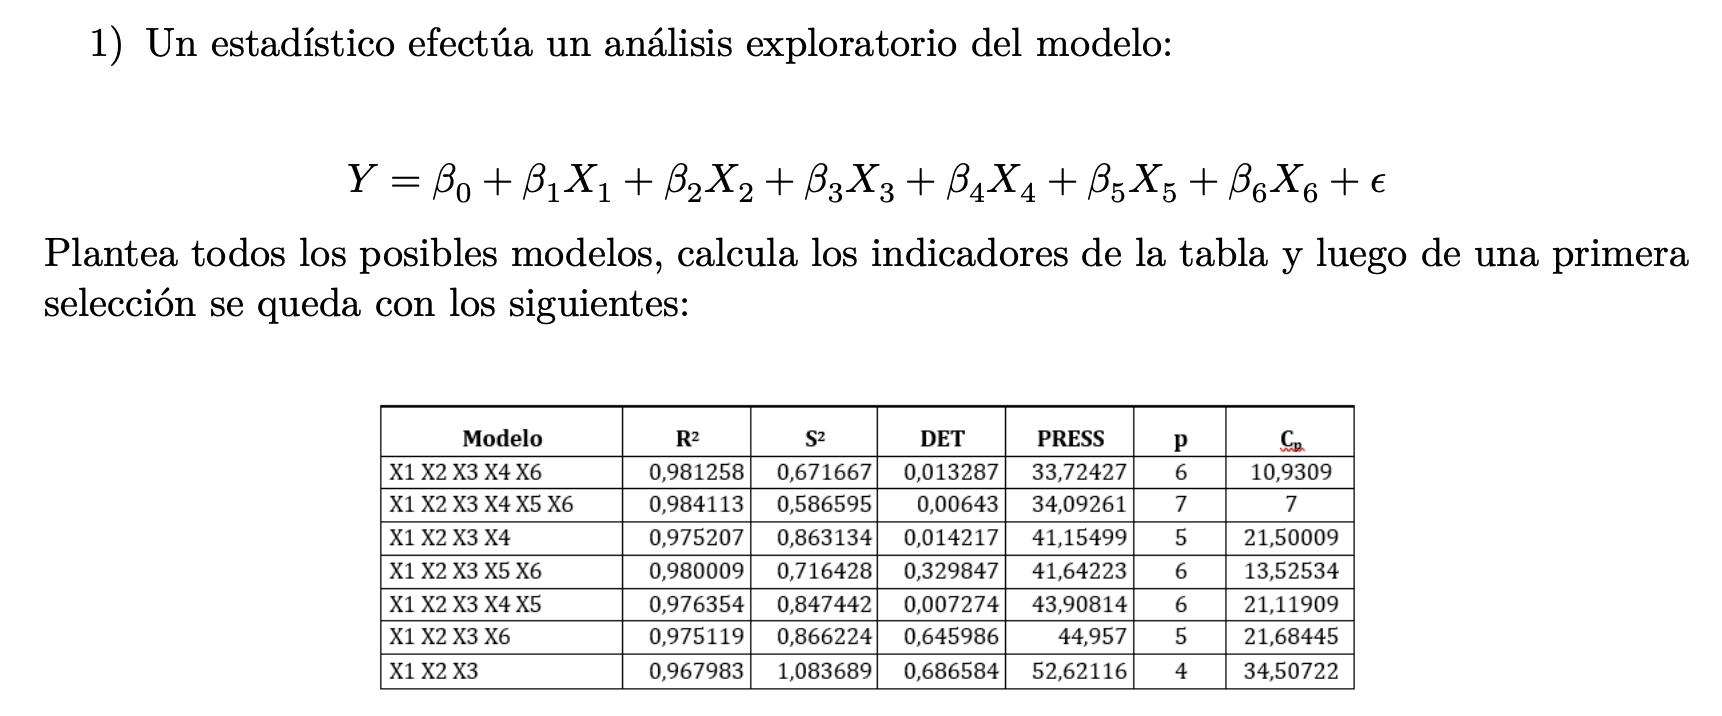

### **A) ¿Cuántos posibles modelos se plantearon? ¿Qué modelo elegiría? Justifique detalladamente su decisión.**

> Sabiendo que para K variables, existen 2^(K) -1 Modelos posibles. podemos calcular la cantidad de modelos planteados (ya que sea plantearon todos los posibles segun el enunciado del problema). Sabiendo que existen K=6 variables predictoras:

> **2^(6)-1 = 63 ==> 63 Modelos posibles.**


Como sabemos que modelo elegir? Debemos tener en cuenta los indicadores calculados por el estadistico:

- R2    
- S2
- DET
- PRESS
- P
- CP



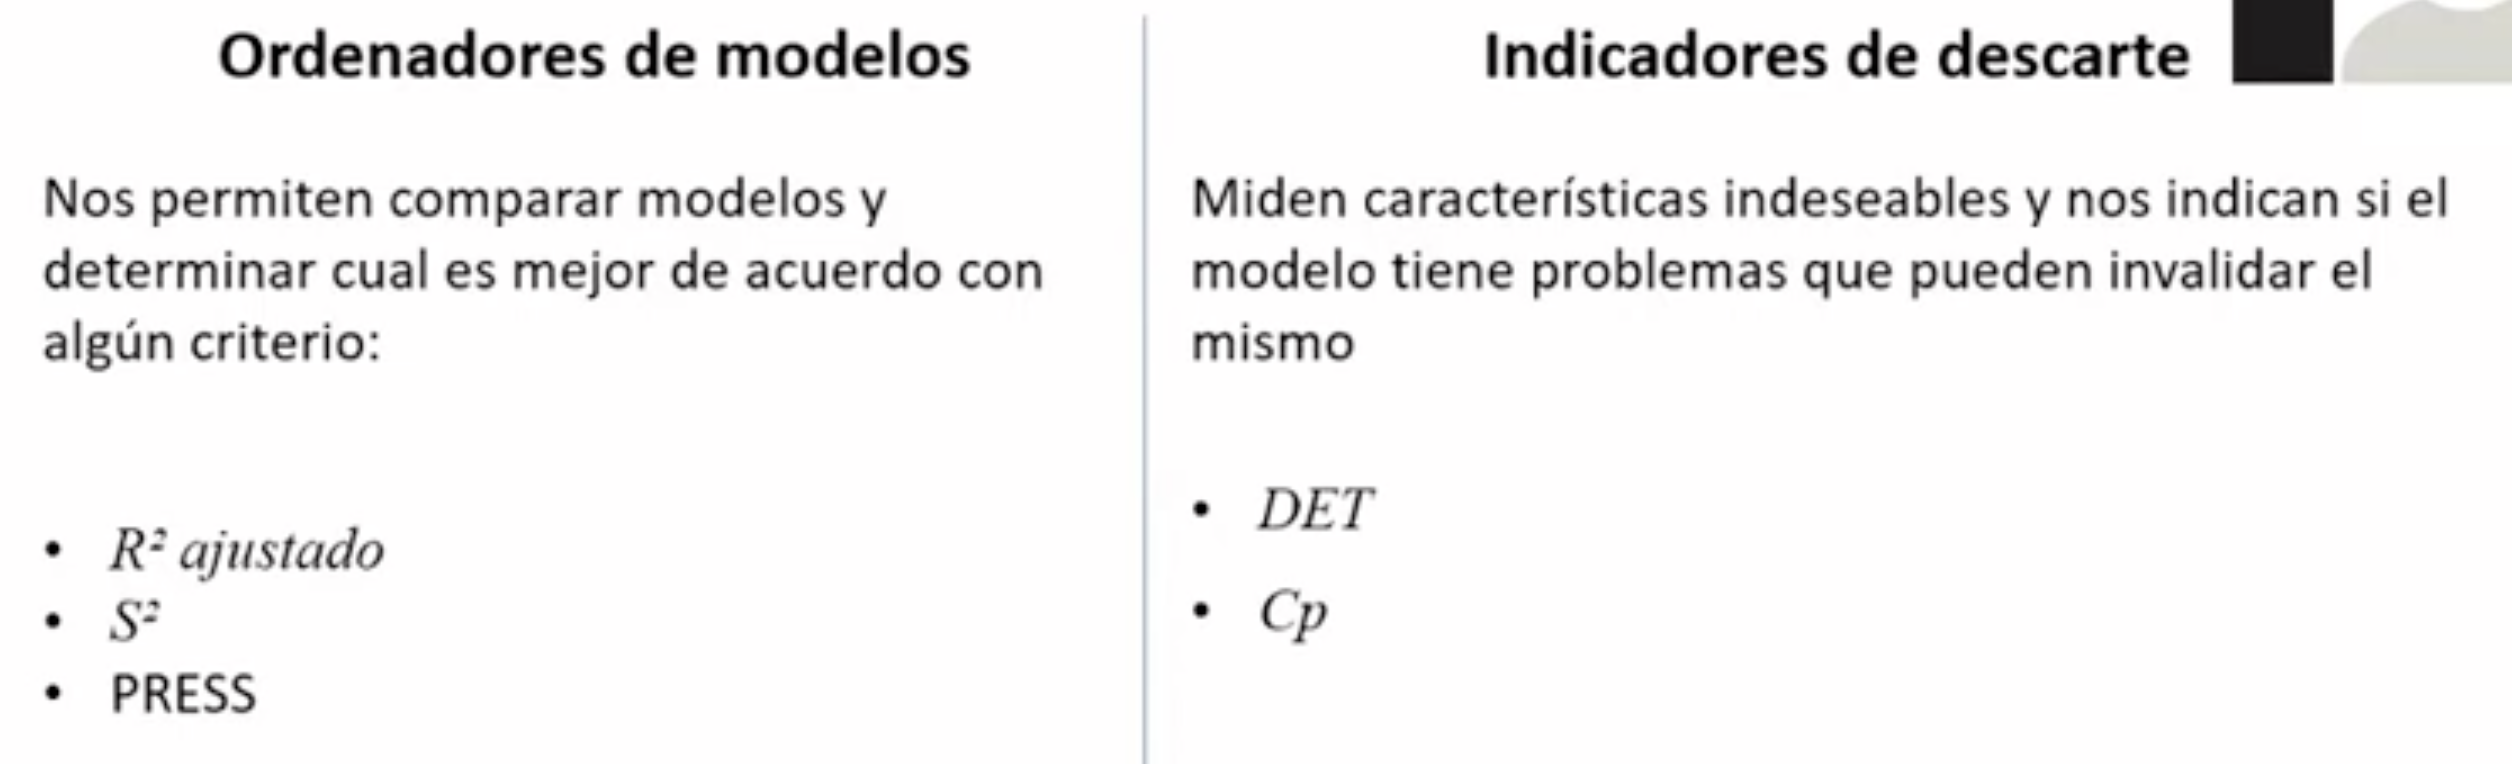

- **Paso 1:** Descartamos los modelos que presenten alta colinealidad en funcion de los valores del DET

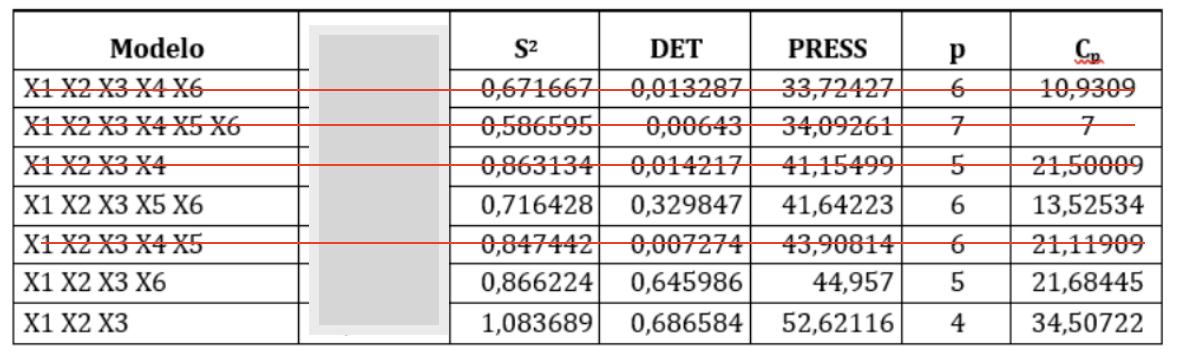

- **Paso 2:** Descartamos los modelos que esten incompletos (no incluyan variables predictoras importantes) a partir de los resultados del CP. Para esto, tomamos como criterio (Donde P = 6 es la cantidad de variables del modelo):

- Buen valor de CP ==>  CP/P < 5
- Mal valor de CP ==> CP/P > 5


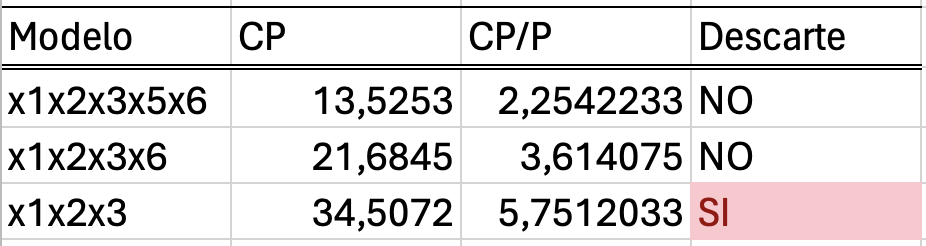

> Eliminamos entonces, el modelo x1x2x3, restando elegir unicamente entre dos modelos superadores

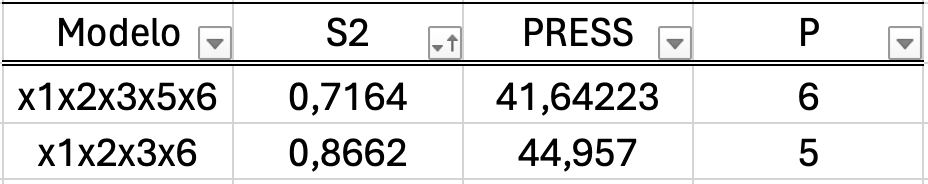



- **Paso 3:** Finalmente, ordenamos los modelos en funcion de los valores del S2 y por los del PRESS (notar que no podemos ordenar por R2 ya que no es el Ajustado y por lo tanto no nos sirve para esto). Ordenando los modelos por menor S2 y menor PRESS obtenemos:


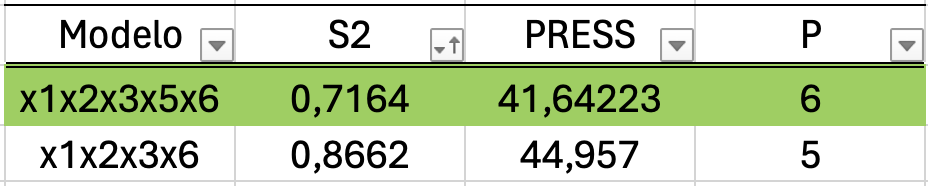



> #### **Por lo tanto, el mejor de los modelos que obtuvo el analista es el que contempla las variables x1x2x3x5x6**

### **B) Explique que son el DET, el PRESS y el Cp.**

> El DET, PRESS y CP son indicadores que nos permiten ordenar y descartar modelos de regression

- **El DET**: es el determinante de la matriz de correalación de las variables del modelo. Nos permite detectar problemas de multicolinealidad. Valores del determinante cercanos a cero nos indican alta dependencia lineal entre las variables predictoras.

- **El CP**: es un indicador de "la completitud" del modelo. Me permite determinar que tan complejo es mi modelo en relacion a otros y si me falta complejidad para que el modelo pueda explicar los datos. Nos permite detectar modelos "incompletos", que les falten variables explicativas relevantes. Debe tomar valores cercanos a K para modelos completos.

- **El PRESS**: es la suma de los residuos PRESS al cuadrado. A menor valor de PRESS, mejor será el modelo. Es un incador que mide la **capacidad de predicción de un modelo.**

## **Info Extra sobre algoritmos no estadisticos para selección de modelos y variables**

**1. Algoritmo Stepwise Forward**

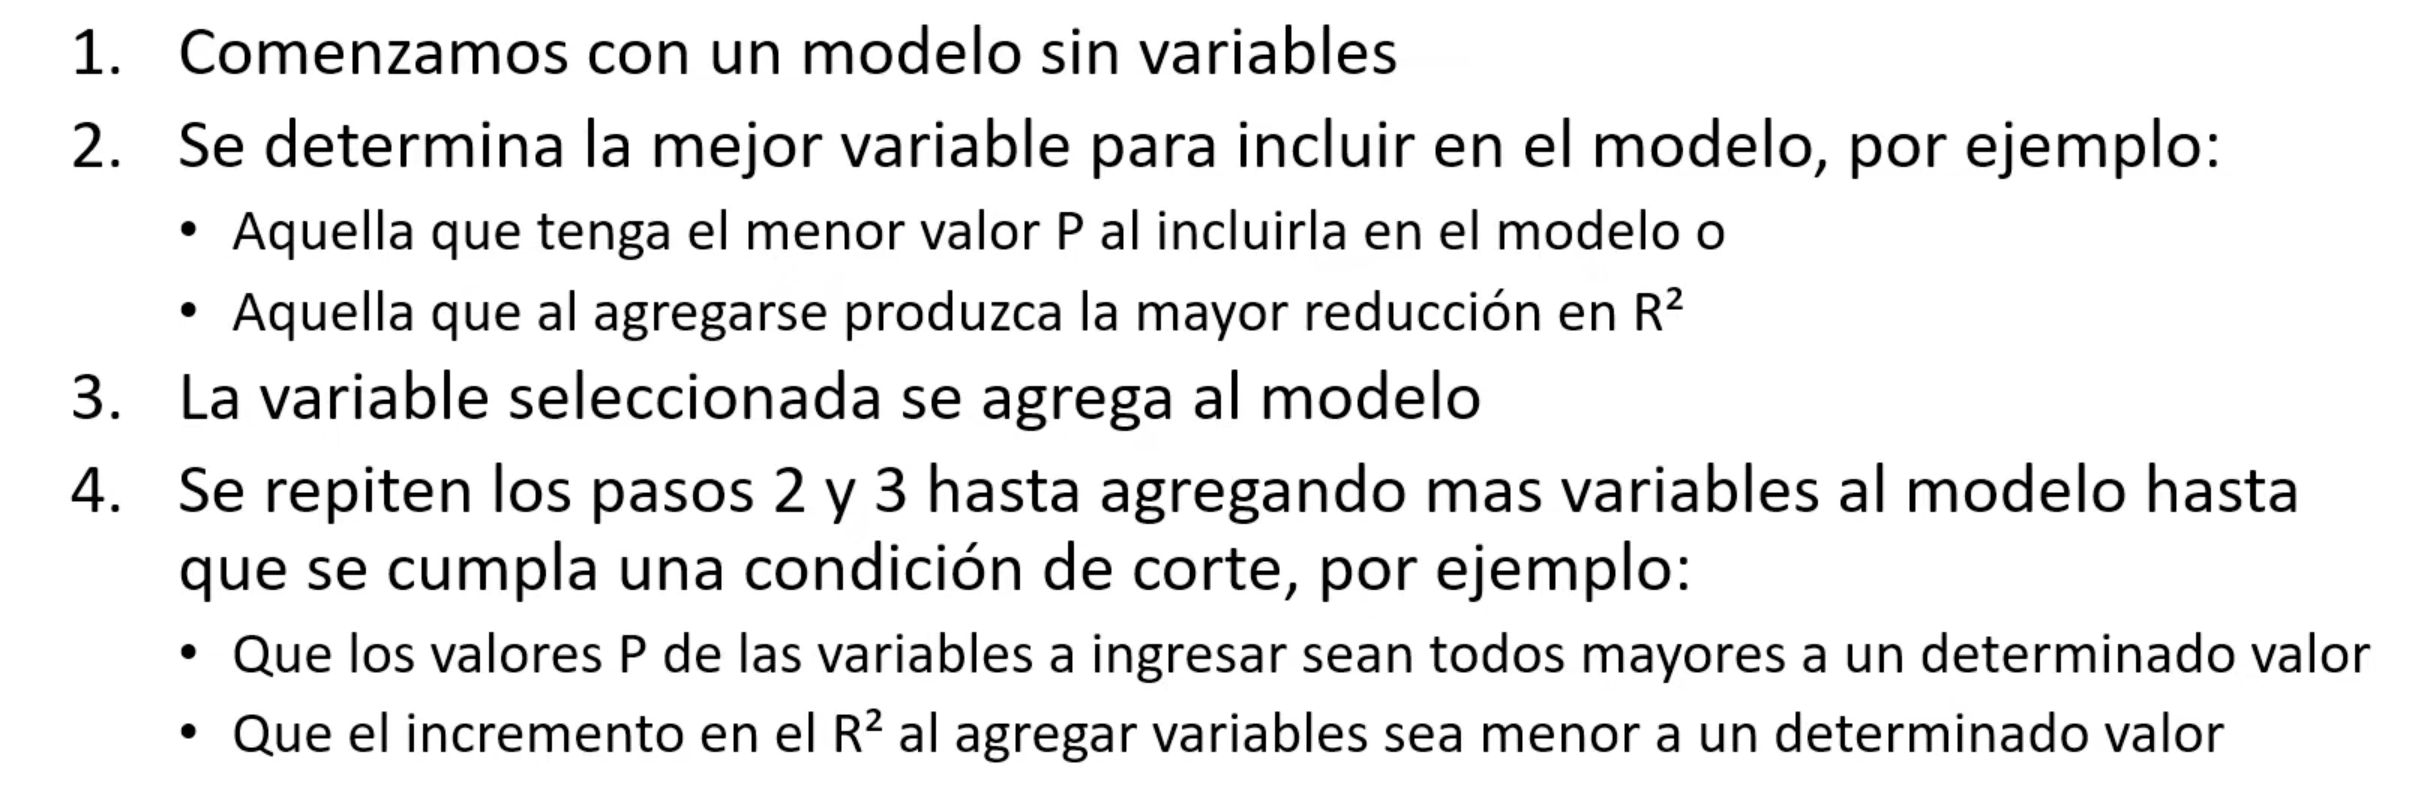

**2. Algoritmo Stepwise Backward**

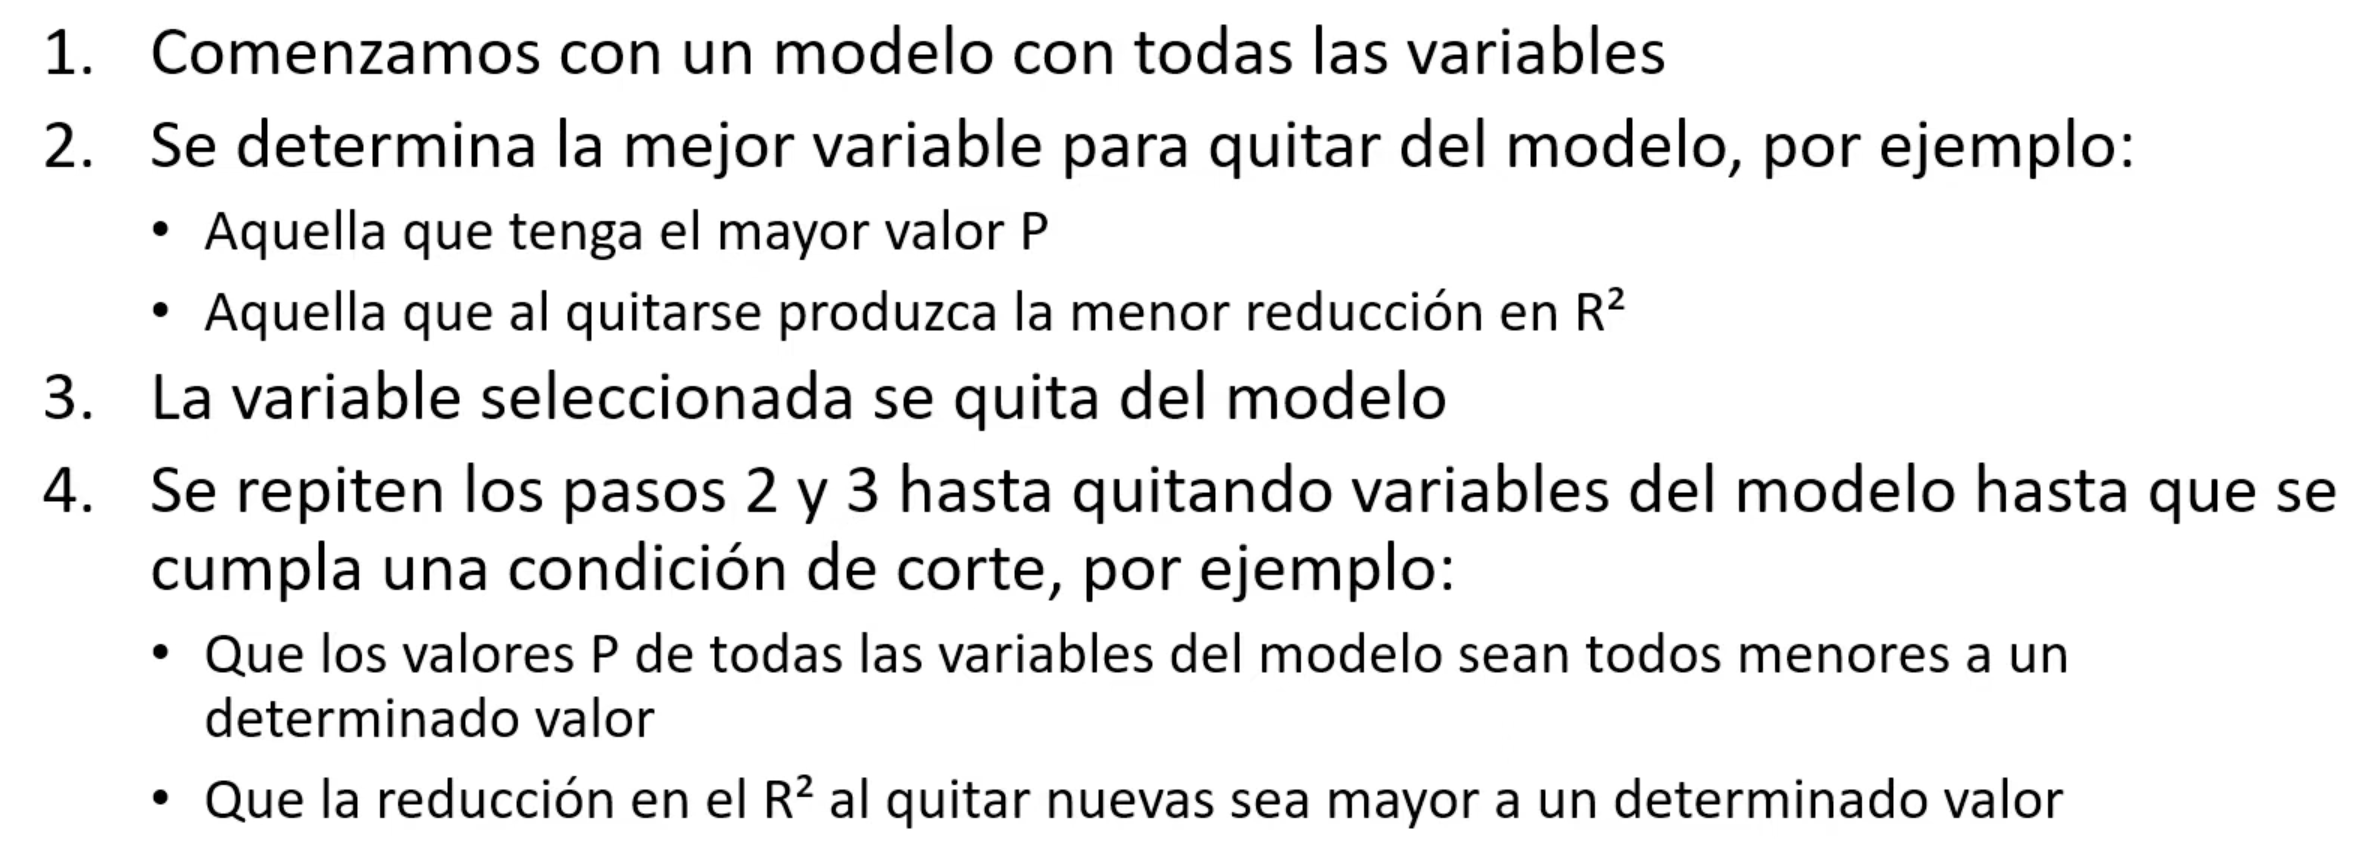

> Sacamos de una las no significativas y no todas a la vez, ya que podemos tener variables que parezcan no significatvas debido a problemas de multicolinealidad. Si sacamos de a una (empezando por la menos significativa) podemos ir resolviendo estos problemas de multicolinealidad y eliminar las que realmente no tengan significancia.

**3. Algoritmo Stepwise Both**

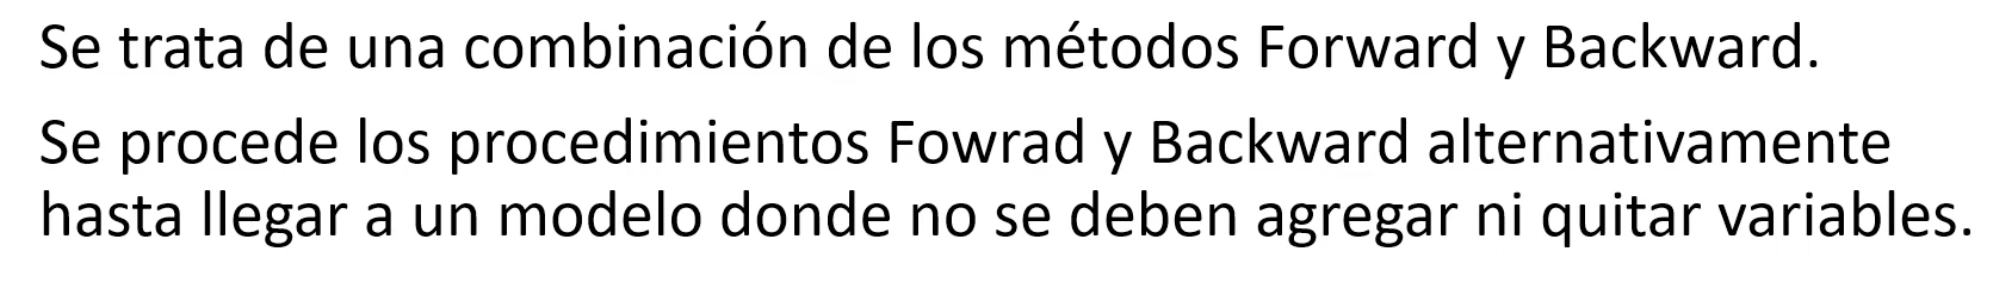

> Es una heuristica para mejorar las dos anteriores, ya que la multicol no es un problema totalmente lineal, a veces puedo haber sacado una variable que parecia tener problemas de multicolinealidad pero que despues cuando la agregue (pasos mas tarde cuando no saque mas) funcione bien.

**4. Algoritmo Best Subsets**

Consiste en correr todos los modelos (~Fuerza bruta) calcular todos los indicadores posibles, y luego dedicir cual es el mejor en base a estudiar los resultados de los modelos.

Esto es lo que "hizo" el investigador del problema. Queda pendiente estudiar los resultados de los indicadores para quedarse con el mejor modelo.

Nota: sirve para valores de K variables predictoras no tan grandes, ya que escala muy rapido y la matriz de resultados no entraria en memoria.



#### Metodos Estadisticos:

- Lasso Regression
- Ridge Regression

> Vamos a ver el primero en la parte de ML, pero ridge queda para la materia de ciencia de datos.